In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from ImageFolderDataset import ImageFolderDataset
from ClothingClassifier import ClothingClassifier
from loop_functions import train_step, test_step

Image shape: torch.Size([1, 60, 60])


Text(0.5, 1.0, 'Sports Shoes')

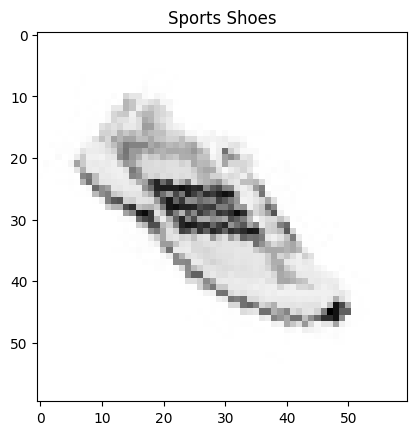

In [2]:
IMG_SIZE = (60, 60)
# prepare set of transforms on images to make training more robust
data_transform = transforms.Compose([transforms.Resize(size=IMG_SIZE),
                                    transforms.RandomRotation(degrees=(-90, 90), fill=255),
                                    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
                                    transforms.Grayscale(),
                                    transforms.ToTensor()])

# utilize custom Dataset to load the images and labels
clothing_dataset = ImageFolderDataset('dataset/cleaned_styles.csv', 'dataset/e-commerce/images', 'articleType', transform=data_transform)
image, label = clothing_dataset[59]
classes = clothing_dataset.classes

# visualize an entry
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap='gray') # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(classes[label])

In [3]:
# split into train and test datasets
data_size = len(clothing_dataset)
data_size
train_size = int(0.75 * data_size)
test_size = data_size - train_size
train_size, test_size

train_dataset, test_dataset = random_split(clothing_dataset, [train_size, test_size])
train_dataset[0]

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 7)

In [4]:
# prepare data loaders
BATCH_SIZE = 32

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [5]:
# classification acccuracy metric
def accuracy_fn(y_pred, y_true):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [6]:
model = ClothingClassifier(input_shape=1, hidden_units=10, output_shape=len(classes))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

epochs = 30
for epoch in range(epochs):
  train_res = train_step(model, train_dataloader, loss_fn, optimizer, accuracy_fn)
  test_res = test_step(model, test_dataloader, loss_fn, accuracy_fn)
  print(train_res, test_res)

Train loss: 2.53204	Train accuracy: 27.74% Test loss: 2.50717	Test accuracy: 28.18%
Train loss: 2.29904	Train accuracy: 31.52% Test loss: 2.20931	Test accuracy: 35.12%
Train loss: 1.70324	Train accuracy: 44.43% Test loss: 2.23295	Test accuracy: 42.10%
Train loss: 1.48578	Train accuracy: 50.75% Test loss: 1.59824	Test accuracy: 46.50%
Train loss: 1.37570	Train accuracy: 53.69% Test loss: 1.53464	Test accuracy: 49.68%
Train loss: 1.31718	Train accuracy: 55.35% Test loss: 1.41973	Test accuracy: 52.27%
Train loss: 1.28292	Train accuracy: 56.43% Test loss: 1.44667	Test accuracy: 51.56%
Train loss: 1.23967	Train accuracy: 57.46% Test loss: 1.31212	Test accuracy: 57.12%
Train loss: 1.21759	Train accuracy: 58.33% Test loss: 1.53961	Test accuracy: 50.43%
Train loss: 1.26565	Train accuracy: 56.60% Test loss: 1.61927	Test accuracy: 46.00%
Train loss: 1.19409	Train accuracy: 58.89% Test loss: 1.14385	Test accuracy: 60.60%
Train loss: 1.17345	Train accuracy: 59.69% Test loss: 1.98922	Test accuracy: